In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split

In [8]:
titanic_data = pd.read_csv('desktop/titanic.csv')
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [11]:
print(' # of passangers in original data:' +str(len(titanic_data.index)))

 # of passangers in original data:887


In [ ]:
# creating different plot to check correlations between variables

## Analyzing Data

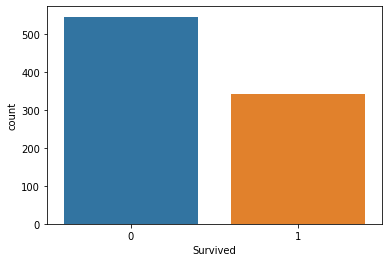

In [12]:
sns.countplot(x='Survived', data=titanic_data)
# 0 stands for passangers who did not survived
# 1 stands for passangers who survived

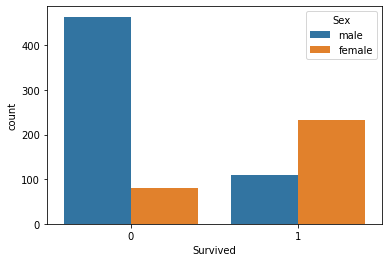

In [14]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
# to compute gender survival rate

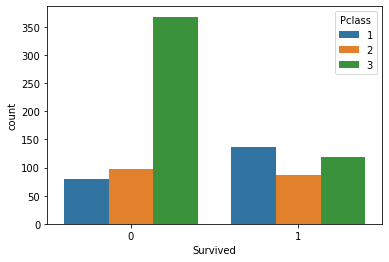

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
#people who survive majorly belong to higher class 1
#passangers who didnt survive are majorly belongs to lowest class 3

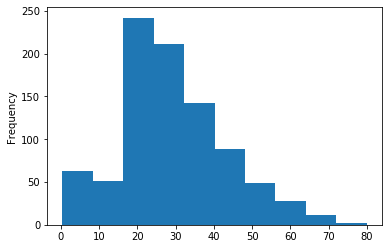

In [16]:
titanic_data['Age'].plot.hist()
# by age plot we understood that we have more young age and mediacore passangers rather than old ages

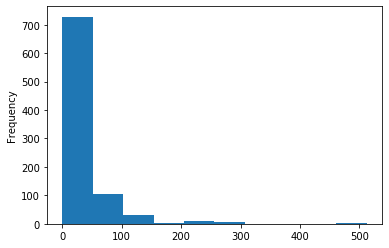

In [19]:
titanic_data['Fare'].plot.hist()

In [21]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


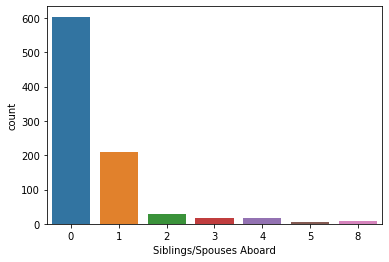

In [22]:
sns.countplot( x='Siblings/Spouses Aboard', data=titanic_data)
# it has max. value in 0 so can conclude that neither a children nor a spouse was on titanic

## Data Wrangling

In [23]:
titanic_data.isnull()
#False where the values are not null else True

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


In [27]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

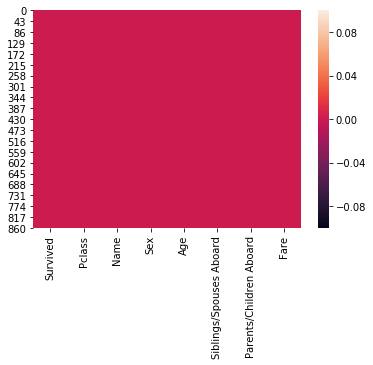

In [30]:
sns.heatmap(titanic_data.isnull())
#no missing values
#no Nan value so entirly blank heatmap

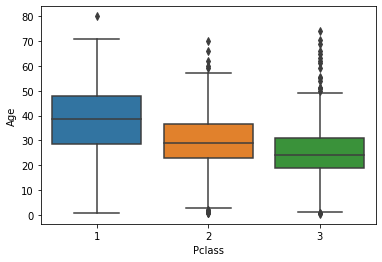

In [31]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)
#passangers who are traveling in class 1 and class2 are tend to be older than the passangers in class 3

In [32]:
titanic_data.head(5)
#since we dont have NaN value in any column so we dont need cleaning

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [35]:
#string has to be converted to categorical variable 
pd.get_dummies(titanic_data['Sex'])



,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [45]:
# we dont need two column so we need just one column
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [48]:
Pcl=pd.get_dummies(titanic_data['Pclass'], drop_first= True)
Pcl.head(5)
#if both values are 0 it means passangers traveling the first class
# now values are categorical 
# then we need to concatinate all new rows into dataset

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [50]:
titanic_data=pd.concat([titanic_data, sex, Pcl], axis=1)
titanic_data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1,1,0,1


## Train & Test Data 

In [ ]:
#Build the model on train data and predict the output on the test data

In [61]:
X=titanic_data.drop('Survived', axis=1)
y=titanic_data['Survived']
# X is features or independent variables 
# y is dependent varibale or predicted value


In [66]:
# cross_selection is not active anymore so use model_selection
#for splitting data set into train and test sets

from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel=LogisticRegression()

In [82]:
logmodel.fit(X_train, y_train)

C:\Users\shagh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
predictions = logmodel.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test, predictions)
# 160 means a value when a model predict as no and in reality it is also no
#similarily 63 is predicted as yes and actual value was yes too


array([[160,  17],
       [ 25,  65]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(y_test, predictions)

0.8426966292134831

In [85]:
from sklearn.metrics import classification_report 
print (classification_report (y_test, predictions))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       177
           1       0.79      0.72      0.76        90

    accuracy                           0.84       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.84      0.84      0.84       267

